### Preface

For a while I have been curious about L-theanine, an amino acid that is found in tea leaves. There is some research showing that it can improve cognition, memory and concentration.  Check [one](https://pubmed.ncbi.nlm.nih.gov/20079786/), [two](https://www.liebertpub.com/doi/10.1089/jmf.2009.1374), [one more](https://www.sciencedirect.com/science/article/pii/S0301051107001573?via%3Dihub). But effects have been described as having "unclear or conflicting scientific evidence" and sometimes even "fair negative scientific evidence". Though if you have a look at reddit biohacking communities, it seems to work like a charm.

While there is no proper body of evidence to lean to either use it or not, I decided to experiment myself. Single-Case Experimental Design  is a research design that has, of course, its drawbacks and can’t be used to generalize. But it is better evidence than “say so on the internet”. Plus, more fun.

### Links

I was pleased to find out that there is some literature on how to conduct one.

["Self-E - Quantified Self Experimentation"](https://play.google.com/store/apps/details?id=edu.brown.selfe) is a nice app, that helps to avoid all the hassle with setup and statistics. Just select a hypothesis and experiment.

[“Lessons Learned from Two Cohorts of Personal Informatics Self-Experiments”](http://cs.brown.edu/people/ndaskalo/SelfExperimentsPaper.pdf) is a great paper that describes  how novices run self-experiments. Also has useful guidelines.

[“Design and Implementation Of N-of-1 Trials:A User’s Guide. Chapter 1”](https://effectivehealthcare.ahrq.gov/sites/default/files/pdf/n-1-trials_research-2014-5.pdf) is a helpful guide with explanations of challenges and ways to avoid them. 

[“Single-Case Experimental Designs: A Systematic Review of Published Research and Current Standards”](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3652808/) sums up current standards in the field.



### Design

In core, rules are similar to any experiment setup:
* Create specific hypotheses you want to test.

* Choose a randomized setup, that would either prove or reject your hypothesis. Maybe checkout ‘A-B-A-B design’.

* Choose the method of analysis before you see data.

* Stay put and conduct your experiment till the end. Be aware of tracking fatigue.

There are some pitfalls to be cautious about. Keywords are `observer bias`, `p-value depends on sample size`, `carry-over effects`.

I was worried that knowing when I take L-theanine and when not, would influence my judgement, So with some help of a fellow experimenter I have developed a setup that would blind me, but required the help of a second person.

**Length of experiment:** 35 days

**Number of AB phases:** 3

**Length of phase:** 10 days (5 days for baseline (placebo) and 5 days for intervention)

**Order within phase:** random in each phase

**Start of the first phase:** on random day within 5 days from the beginning

So a fellow experimenter has chosen a design that would tell, when does the intervention start, what was the order of phases and marked a daily l-theanine pill or placebo pill to preserve a correct order.

**Preparation:**

I got l-theanine from amazon. White flour was used as a placebo.

**Scale to rate concentration:**

1 to 10. 1 being `thoughts are jumping like rabbits` and 10 being `razor sharp mind, shocking concentration`.

During the experiment I have realised, how hard it is to give a mark to the level of concentration. First, the scale had too many grades, I couldn’t make an assessment if my mind was 10-points-sharp or just 9-points-sharp. Second, if I had spent the morning productively, but then the second half of the day went all over the place, I gave a day average score, which didn’t separate it from days, when I was just fine the whole day.

By the end of the experimental phase I had determined that intrinsical scale actually had only four grades: ‘bad’, ‘nothing special’, ‘pretty good’, ‘really good’. So I ended up checking both scales.


### Analysis

Dataframe shows a score I gave to my concentration level on that day, then a simplified score that I have discussed earlier whether this day I got l-theanine (`1`) or placebo (`0`).

In [116]:
result = pd.read_csv('results.csv', index_col=0)
result

,score,simple_score,intervention
2020-02-16,7,2,0.0
2020-02-17,7,2,0.0
2020-02-18,4,1,0.0
2020-02-19,5,1,1.0
2020-02-20,6,1,1.0
2020-02-21,5,1,1.0
2020-02-22,5,1,1.0
2020-02-23,5,1,1.0
2020-02-24,4,1,0.0
2020-02-25,8,2,0.0


First, I just wanted to have a glance, how different are distributions of scores in both scales.

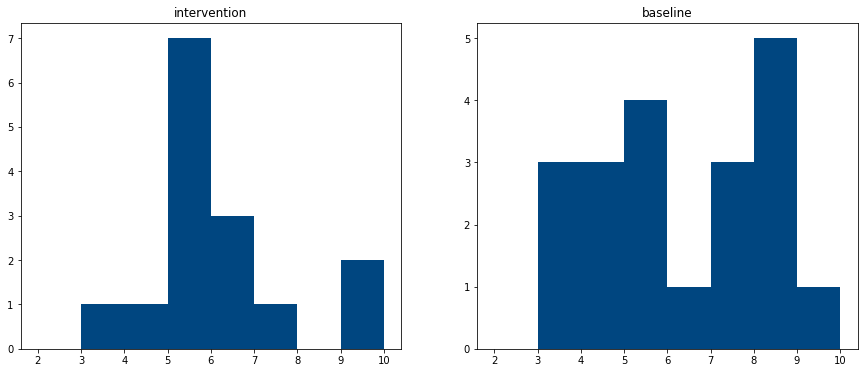

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].hist(with_i, bins=list(range(2, 11)), color='#004680')
ax[0].set_title('intervention')
ax[1].hist(without_i, bins=list(range(2, 11)), color='#004680')
ax[1].set_title('baseline')
plt.show()

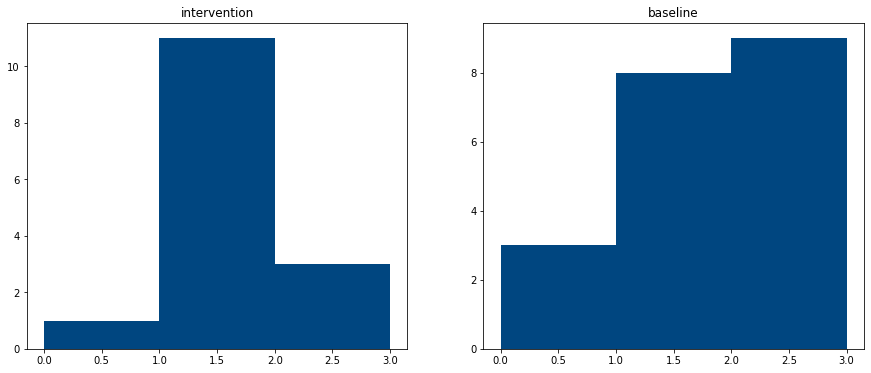

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].hist(with_i_simple, bins=list(range(0, 4)), color='#004680')
ax[0].set_title('intervention')
ax[1].hist(without_i_simple, bins=list(range(0, 4)), color='#004680')
ax[1].set_title('baseline')
plt.show()

Dadum tss! Does it look totally random to you? To me too. Let’s check ANOVA, which tests the null hypothesis that two groups have the same mean.


In [83]:
with_i = result.loc[result['intervention']==1]['score']
without_i = result.loc[result['intervention']==0]['score']

stats.f_oneway(with_i, without_i)

F_onewayResult(statistic=0.08497371837160306, pvalue=0.7724915807942058)

In [75]:
with_i_simple = result.loc[result['intervention']==1]['simple_score']
without_i_simple = result.loc[result['intervention']==0]['simple_score']

stats.f_oneway(with_i_simple, without_i_simple)

F_onewayResult(statistic=0.0914330045439433, pvalue=0.7642609587622116)

Oh, well, there is no difference between taking an actual supplement or placebo. They tell you that no result is also a result, but you know, wouldn’t it be great to have a supplement that makes you ninja-concentrated?

So bring a bit more fun to such a not existing result, have a look at my concentration assessment.

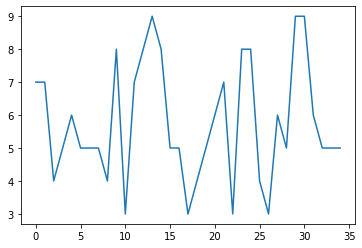

In [106]:
plt.plot(range(0, 35), result['score'])

Does it remind you of anything? Right! Absolutely random data!

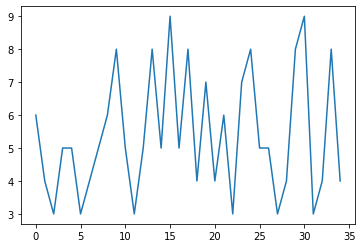

In [101]:
plt.plot(np.random.choice(range(3, 10), size=35))